<a href="https://colab.research.google.com/github/nimran79/COMP8118_project-Traffic-volume-prediction/blob/main/DM_Project_metro_interstate_traffic_volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metro Interstate Traffic Volume

### Abstract: Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.
https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

1. holiday Categorical US National holidays plus regional holiday, Minnesota State Fair 
2. temp Numeric Average temp in kelvin 
3. rain_1h Numeric Amount in mm of rain that occurred in the hour 
4. snow_1h Numeric Amount in mm of snow that occurred in the hour 
5. clouds_all Numeric Percentage of cloud cover 
6. weather_main Categorical Short textual description of the current weather 
7. weather_description Categorical Longer textual description of the current weather 
8. date_time DateTime Hour of the data collected in local CST time 
9. traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
#Import necessary libraries
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
#Importing dataset from csv to data frame
df_traffic_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz")

In [6]:
df_traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
df_traffic_data.shape

(48204, 9)

In [8]:
df_traffic_data.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [9]:
df_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### No null value is present in the data.

In [10]:
df_traffic_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [11]:
df_traffic_data.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


In [ ]:
# data is collected over 6 years
print("max date :" +df_traffic_data.date_time.max())
print("min date :" +df_traffic_data.date_time.min())

### Univariate Analysis

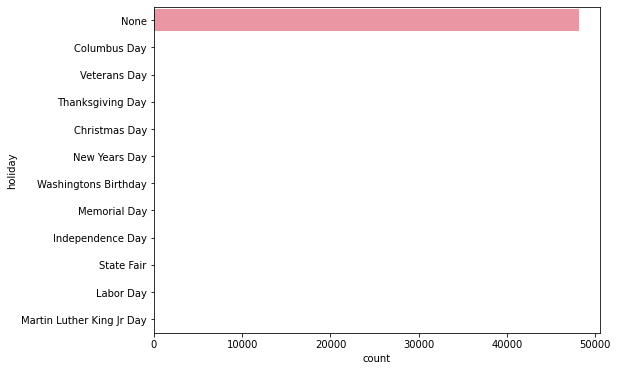

In [13]:
#Plotting frequency of each category in holiday column
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = df_traffic_data)
plt.show()

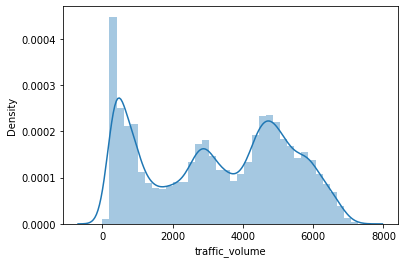

In [14]:
sns.distplot(df_traffic_data.traffic_volume)

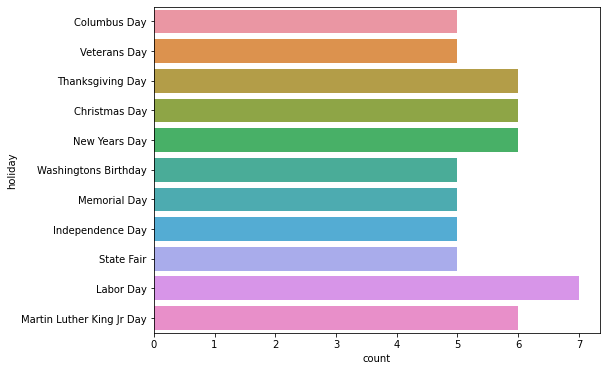

In [15]:
#'None' is far greater than the other days. Removing None data to visualize the others
holidays = df_traffic_data.loc[df_traffic_data.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

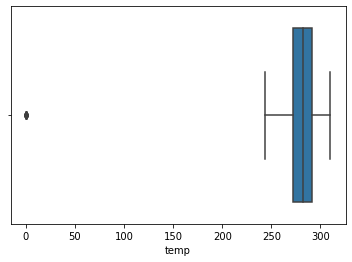

In [16]:
#plotting distribution of temperature variable
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df_traffic_data)
plt.show()

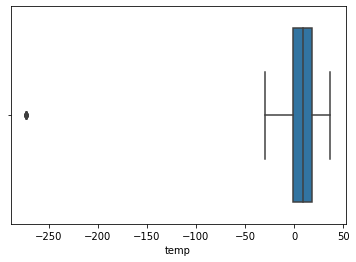

In [17]:
#Temperature is measured in Kelvin, changing to degree celsius to make it more intuitive
#convert kelvin to celsius
#(0K − 273.15)
df_traffic_data['temp'] = (df_traffic_data['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df_traffic_data)
plt.show()

There is one data point far away from the rest around -300 degrees celsius. Clearly, this is an error in recording. This needs to be eliminated in the data cleaning phase.

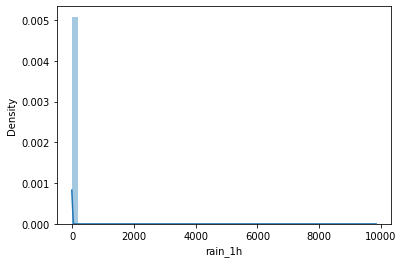

In [19]:
#Plotting rain variable
plt.figure(figsize=(6,4))
sns.distplot(df_traffic_data.rain_1h)
plt.show()
#From the distribution, it shows that the data is extremely skewed. Most of the observations are concentrated around 0.

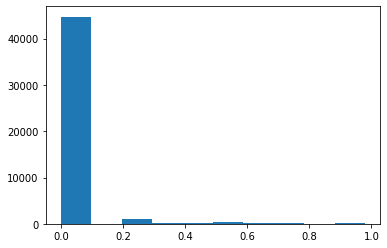

In [20]:
#Plotting observations with values less than 1mm rain shows that more than 40000 observations are around 0.
plt.hist(df_traffic_data.rain_1h.loc[df_traffic_data.rain_1h<1])
plt.show()

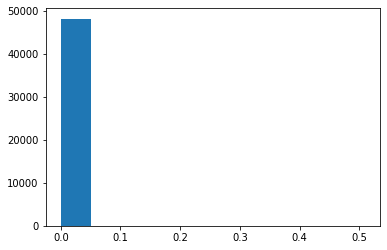

In [21]:
#Plotting snow variable indicates that data is again skewed and most of the observations have value close to 0.0.
plt.hist(df_traffic_data.snow_1h)
plt.show()

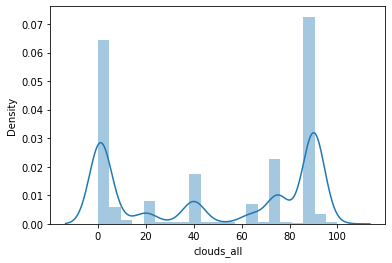

In [22]:
#clouds_all indicates the cloud coverage for the given day and hour
sns.distplot(df_traffic_data.clouds_all)
plt.show()

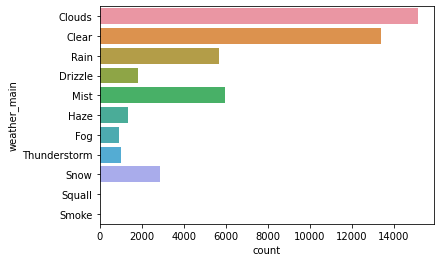

In [23]:
#exploring different categories in weather_main
sns.countplot(y='weather_main', data=df_traffic_data)

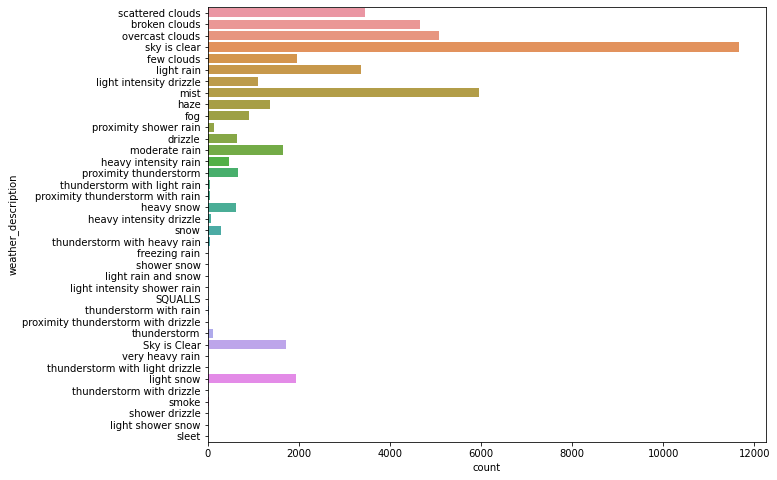

In [24]:
#exploring different categories in weather_description
plt.figure(figsize=(10,8))
sns.countplot(y='weather_description', data=df_traffic_data)
plt.show()

### Bivariate Analysis

Exploring relationship between traffic and other features

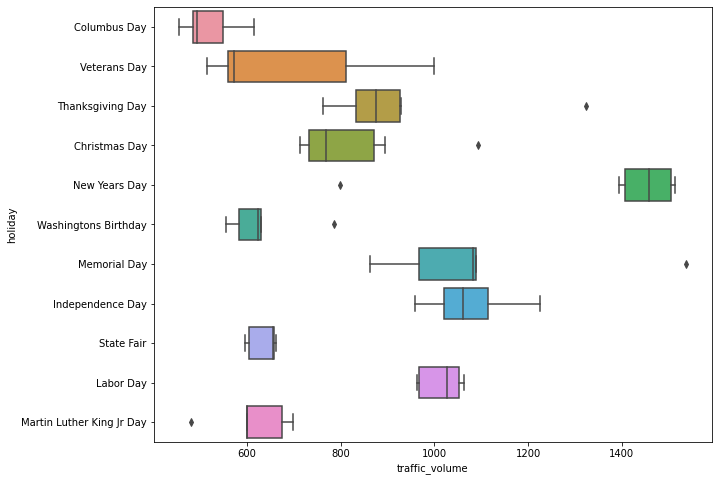

In [25]:
#Exploring traffic volume on holidays
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

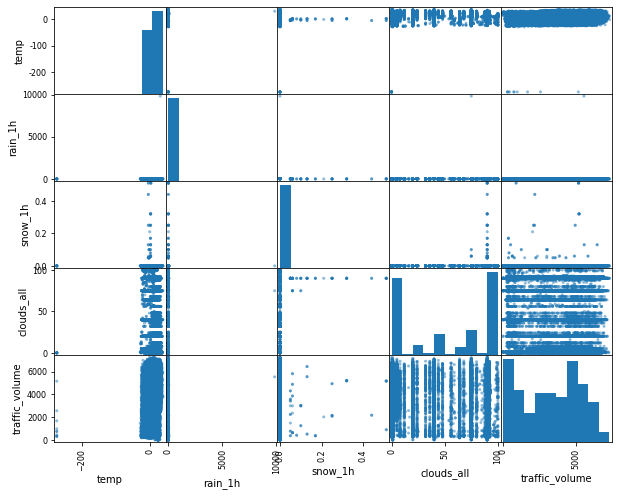

In [26]:
#Plotting relationship between temp, rain_1h, snow_1h, cloud_all.
num_vars = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
from pandas.plotting import scatter_matrix
scatter_matrix(df_traffic_data[num_vars],figsize=(10,8))
plt.show()

<Figure size 720x576 with 0 Axes>

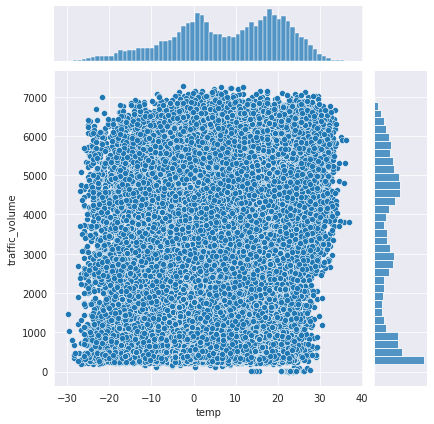

In [27]:
#plotting temperature against traffic volume
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='traffic_volume', x='temp', data = df_traffic_data.loc[df_traffic_data.temp>-50])
plt.show()

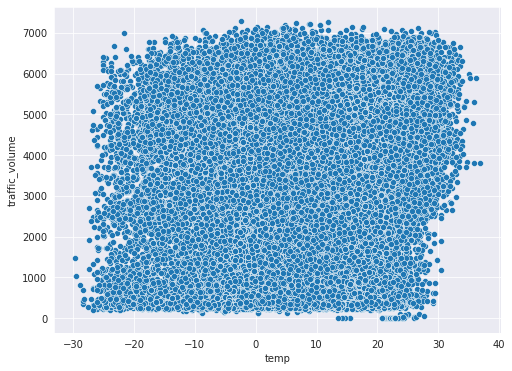

In [28]:
#scatterplot between traffic_volume and temp
plt.figure(figsize=(8,6))
sns.scatterplot(y='traffic_volume', x='temp', data = df_traffic_data.loc[df_traffic_data.temp>-50])

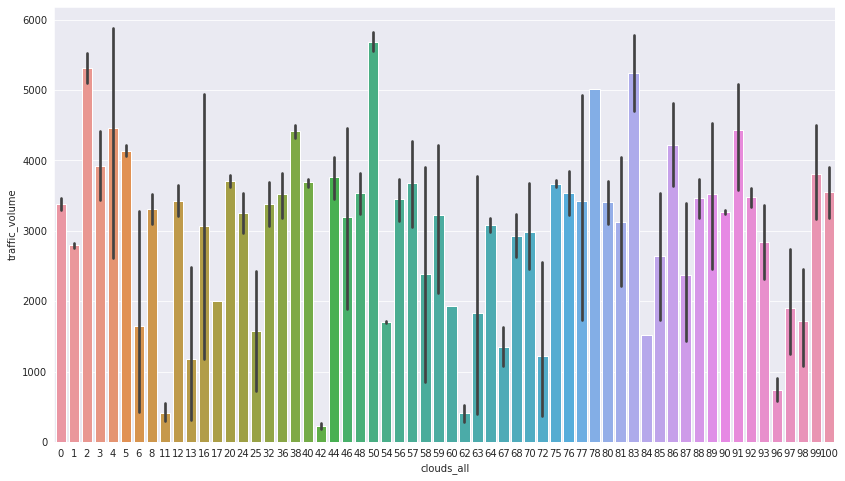

In [29]:
#Plotting traffic volume over clouds_all
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = df_traffic_data)
plt.show()

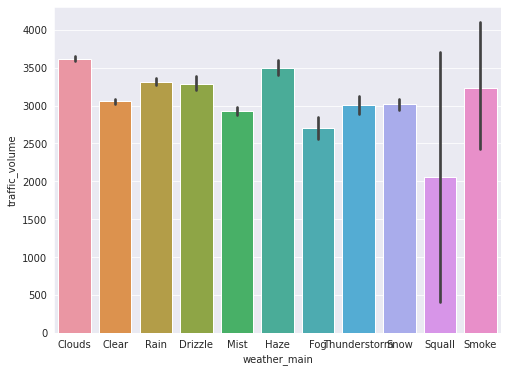

In [30]:
#Plotting weather_main over traffic volume
plt.figure(figsize=(8,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = df_traffic_data)
plt.show()

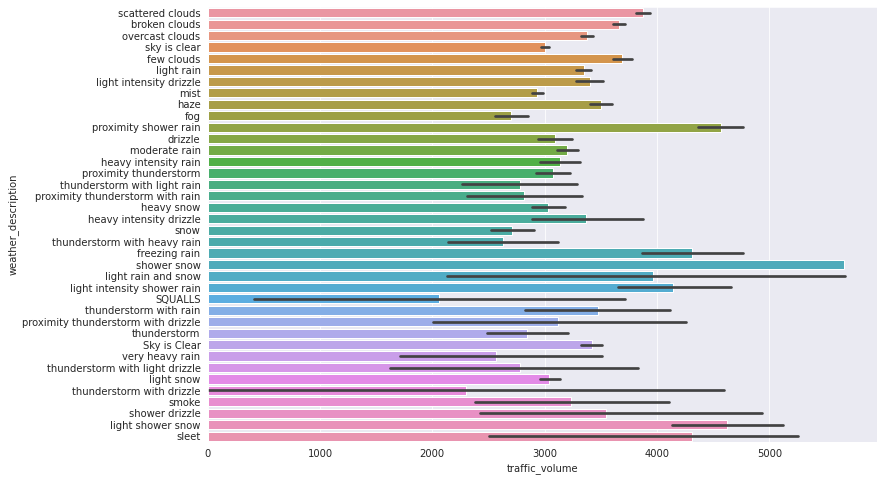

In [31]:
#Plotting weather_description over traffic volume
plt.figure(figsize=(12,8))
sns.barplot(y='weather_description', x = 'traffic_volume', data = df_traffic_data)
plt.show()

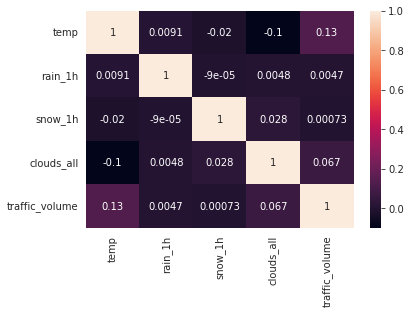

In [32]:
#correlation between different numeric variables. plot shows no strong correlation between traffic and other variables
sns.heatmap(df_traffic_data.corr(), annot=True)
plt.show()

# Data cleaning and Feature engineering

In [33]:
#copying data to new data frame
df_traffic_features = df_traffic_data.copy()

In [34]:
#Extracting features from date_time variable
df_traffic_features['date_time'] = pd.to_datetime(df_traffic_features.date_time)
df_traffic_features['weekday'] = df_traffic_features.date_time.dt.weekday
df_traffic_features['date'] = df_traffic_features.date_time.dt.date
df_traffic_features['hour'] = df_traffic_features.date_time.dt.hour
df_traffic_features['month'] = df_traffic_features.date_time.dt.month
df_traffic_features['year'] = df_traffic_features.date_time.dt.year
#Monday is 0 and Sunday is 6

In [35]:
df_traffic_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012


In [36]:
#categorizing hours to different time periods like morning, afternoon etc
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df_traffic_features['hour'] = df_traffic_features.hour.map(hour_modify)

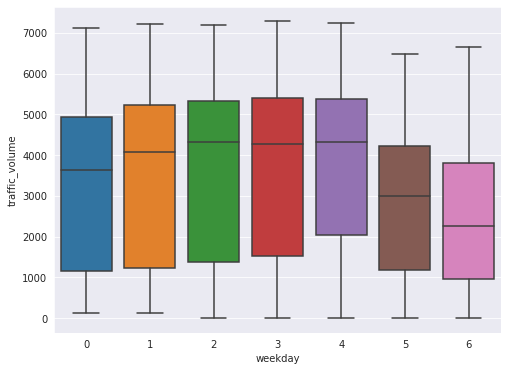

In [37]:
#Traffic volume plotted against weekday. Weekends show less traffic volume.
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday', y='traffic_volume', data = df_traffic_features)
plt.show()

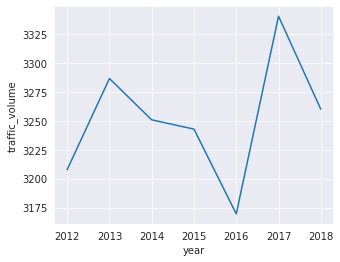

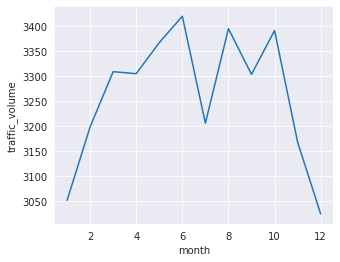

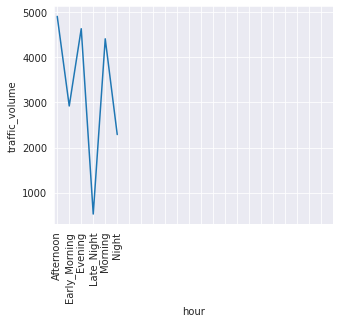

In [38]:
#aggreagating traffic volume over year and plotting 

df_date_traffic = df_traffic_features.groupby(['year']).aggregate({'traffic_volume':'mean'})
df_date_traffic = df_date_traffic.reset_index()

plt.figure(figsize=(5,4))
sns.lineplot(x = df_date_traffic.year, y = df_date_traffic.traffic_volume,  data = df_date_traffic)
plt.show()

df_date_traffic = df_traffic_features.groupby(['month']).aggregate({'traffic_volume':'mean'})
df_date_traffic = df_date_traffic.reset_index()

plt.figure(figsize=(5,4))
sns.lineplot(x = df_date_traffic.month, y = df_date_traffic.traffic_volume,  data = df_date_traffic)
plt.show()

df_date_traffic = df_traffic_features.groupby(['hour']).aggregate({'traffic_volume':'mean'})
df_date_traffic = df_date_traffic.reset_index()

plt.figure(figsize=(5,4))
ax=sns.lineplot(x = df_date_traffic.hour, y = df_date_traffic.traffic_volume,  data = df_date_traffic)
plt.xticks(np.arange(24), rotation=90)
plt.show()

In [39]:
#Other holidays are very sparse compared to none holidays. 
#Hence encoding the holidays as TRUE and none Holidays as FALSE

def modify_holiday(x):
    if x == 'None':
        return 'Work Day'
    else:
        return 'Holiday'
df_traffic_features['holiday'] = df_traffic_features['holiday'].map(modify_holiday)

In [40]:
#Outlier in temp which was detected earlier needs to be removed
df_traffic_features = df_traffic_features.loc[df_traffic_features.temp>-250]

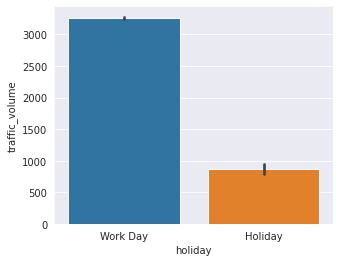

In [41]:
#Traffic volume difference during holiday and non holiday
plt.figure(figsize=(5,4))
sns.barplot(x='holiday', y='traffic_volume', data = df_traffic_features)
plt.show()

In [42]:
#clouds, rain and snow distribution over different weather conditions
df_traffic_features.groupby('weather_description').aggregate({'traffic_volume':[np.mean,np.size],
                                                              'clouds_all':'count','rain_1h':'mean','snow_1h':'mean'})

traffic_volume         ...     rain_1h   snow_1h
                                              mean   size  ...        mean      mean
weather_description                                        ...                      
SQUALLS                                2061.750000      4  ...    3.482500  0.000000
Sky is Clear                           3423.148899   1726  ...    0.000000  0.000000
broken clouds                          3661.142092   4666  ...    0.000000  0.000000
drizzle                                3094.858679    651  ...    0.118710  0.000000
few clouds                             3691.453476   1956  ...    0.000000  0.000000
fog                                    2703.720395    912  ...    0.087007  0.000625
freezing rain                          4314.000000      2  ...    0.000000  0.000000
haze                                   3502.101471   1360  ...    0.046868  0.000000
heavy intensity drizzle                3371.109375     64  ...    0.170156  0.000000
heavy intensity rain                   3140.072805    467  ...    2.656660  0.000000
heavy snow                             3031.472403    616  ...    0.001234  0.000000
light intensity drizzle                3400.567273   1100  ...    0.180600  0.000000
light intensity shower rain            4140.307692     13  ...    0.333077  0.000000
light rain                             3349.257117   3372  ...    0.129404  0.000068
light rain and snow                    3961.166667      6  ...    0.211667  0.000000
light shower snow                      4618.636364     11  ...    0.000000  0.000000
light snow                             3042.770298   1946  ...    0.033320  0.001536
mist                                   2932.956639   5950  ...    0.238336  0.000728
moderate rain                          3202.603966   1664  ...    0.577843  0.000499
overcast clouds                        3375.963590   5081  ...    0.000000  0.000000
proximity shower rain                  4567.845588    136  ...    0.231838  0.000000
proximity thunderstorm                 3076.457652    673  ...    1.072897  0.000000
proximity thunderstorm with drizzle    3117.538462     13  ...    0.325385  0.000000
proximity thunderstorm with rain       2819.269231     52  ...    0.556923  0.000000
scattered clouds                       3875.622363   3461  ...    0.000000  0.000000
shower drizzle                         3547.666667      6  ...    0.000000  0.000000
shower snow                            5664.000000      1  ...    0.000000  0.000000
sky is clear                           3003.014843  11655  ...    0.000000  0.000000
sleet                                  4312.666667      3  ...    0.000000  0.000000
smoke                                  3237.650000     20  ...    0.527000  0.000000
snow                                   2712.122867    293  ...    0.019352  0.006041
thunderstorm                           2843.752000    125  ...    1.121440  0.000000
thunderstorm with drizzle              2297.000000      2  ...    5.345000  0.000000
thunderstorm with heavy rain           2631.142857     63  ...    3.071587  0.000000
thunderstorm with light drizzle        2779.266667     15  ...    2.014667  0.000000
thunderstorm with light rain           2776.833333     54  ...    0.684259  0.000000
thunderstorm with rain                 3476.405405     37  ...    1.699459  0.000000
very heavy rain                        2568.833333     18  ...  570.208333  0.000000

[38 rows x 5 columns]

In [43]:
df_traffic_features['weather_description'] = df_traffic_features['weather_description'].map(lambda x:x.lower())

The weather description mostly describes rain, snow, thunderstorms, fog, mist and haze.

The following new columns will be created:
- thunderstorm - True where weather description contains Thunderstorm else False
- fog - True where weather description contains fog else False
- mist - True where weather description contains mist else False
- haze - True where weather description contains haze else False

In [44]:
#Any row containing "thunderstorm" is replaced by "thunderstorm"
df_traffic_features.loc[df_traffic_features['weather_description'].str.contains('thunderstorm'),'weather_description'] = 'thunderstorm'    

In [46]:
df_traffic_features.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,Work Day,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,Work Day,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,Work Day,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,Work Day,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,Work Day,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012
5,Work Day,18.57,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,1,2012-10-02,Afternoon,10,2012
6,Work Day,20.02,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584,1,2012-10-02,Afternoon,10,2012
7,Work Day,20.71,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015,1,2012-10-02,Evening,10,2012
8,Work Day,20.99,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791,1,2012-10-02,Evening,10,2012
9,Work Day,19.95,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770,1,2012-10-02,Evening,10,2012


In [50]:
# Changing weather description to 'other'
weather = ['thunderstorm','mist','fog','haze']
df_traffic_features.loc[np.logical_not(df_traffic_features['weather_description'].isin(weather)),'weather_description'] = 'other'

In [51]:
df_traffic_features.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,Work Day,15.13,0.0,0.0,40,Clouds,other,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012
1,Work Day,16.21,0.0,0.0,75,Clouds,other,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012
2,Work Day,16.43,0.0,0.0,90,Clouds,other,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012
3,Work Day,16.98,0.0,0.0,90,Clouds,other,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012
4,Work Day,17.99,0.0,0.0,75,Clouds,other,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012
5,Work Day,18.57,0.0,0.0,1,Clear,other,2012-10-02 14:00:00,5181,1,2012-10-02,Afternoon,10,2012
6,Work Day,20.02,0.0,0.0,1,Clear,other,2012-10-02 15:00:00,5584,1,2012-10-02,Afternoon,10,2012
7,Work Day,20.71,0.0,0.0,1,Clear,other,2012-10-02 16:00:00,6015,1,2012-10-02,Evening,10,2012
8,Work Day,20.99,0.0,0.0,20,Clouds,other,2012-10-02 17:00:00,5791,1,2012-10-02,Evening,10,2012
9,Work Day,19.95,0.0,0.0,20,Clouds,other,2012-10-02 18:00:00,4770,1,2012-10-02,Evening,10,2012


In [52]:
#creating dummy variables for these newly created categories in weather description
df_traffic_features = pd.get_dummies(columns=['weather_description'],data=df_traffic_features)

In [53]:
df_traffic_features.rename(columns={'weather_description_fog':'fog', 'weather_description_haze':'haze',
                                   'weather_description_mist':'mist', 'weather_description_thunderstorm':'thunderstorm'}, inplace = True)
df_traffic_features.drop(columns = ['weather_description_other', 'weather_main'], inplace = True)

In [54]:
df_traffic_features.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm
0,Work Day,15.13,0.0,0.0,40,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,0,0,0,0
1,Work Day,16.21,0.0,0.0,75,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,0,0,0,0
2,Work Day,16.43,0.0,0.0,90,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,0,0,0,0
3,Work Day,16.98,0.0,0.0,90,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0
4,Work Day,17.99,0.0,0.0,75,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0


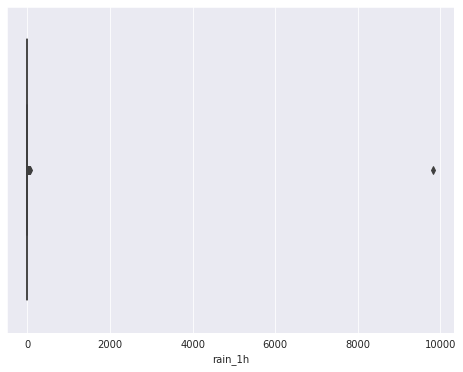

In [56]:
#Ploting rain data shows one outlier data point. It will be removed.
plt.figure(figsize=(8,6))
sns.boxplot('rain_1h',data = df_traffic_features)
plt.show()

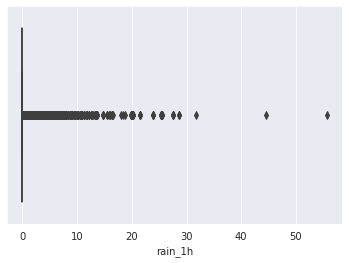

In [57]:
sns.boxplot('rain_1h',data = df_traffic_features.loc[df_traffic_features.rain_1h<2000])

In [58]:
#Removing outlier in rain column and converting numeric data to categories
#rain value equal to 0.0 as no_rain
#rain value greater than 0.0 is cut into 3 quantiles

df_traffic_features = df_traffic_features.loc[df_traffic_features.rain_1h<2000]
df_traffic_features_temp = df_traffic_features.loc[df_traffic_features.rain_1h>0]
rain_q = pd.DataFrame(pd.qcut(df_traffic_features_temp['rain_1h'] ,q=3, labels=['light','moderate','heavy']))
df_traffic_cat = df_traffic_features.merge(rain_q,left_index=True, right_index=True, how='left')

df_traffic_cat['rain_1h_y'] = df_traffic_cat.rain_1h_y.cat.add_categories('no_rain')
df_traffic_cat['rain_1h_y'].fillna('no_rain', inplace = True) #no_rain is not in the category, adding it and filling

df_traffic_cat.drop(columns=['rain_1h_x'], inplace = True)
df_traffic_cat.rename(columns={'rain_1h_y':'rain_1h'}, inplace = True)
df_traffic_cat.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,Work Day,15.13,0.0,40,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
1,Work Day,16.21,0.0,75,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
2,Work Day,16.43,0.0,90,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
3,Work Day,16.98,0.0,90,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain
4,Work Day,17.99,0.0,75,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain


In [59]:
df_traffic_cat.rain_1h.unique()

['no_rain', 'light', 'moderate', 'heavy']
Categories (4, object): ['light' < 'moderate' < 'heavy' < 'no_rain']

In [60]:
df_traffic_features.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm
0,Work Day,15.13,0.0,0.0,40,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,0,0,0,0
1,Work Day,16.21,0.0,0.0,75,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,0,0,0,0
2,Work Day,16.43,0.0,0.0,90,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,0,0,0,0
3,Work Day,16.98,0.0,0.0,90,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0
4,Work Day,17.99,0.0,0.0,75,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0


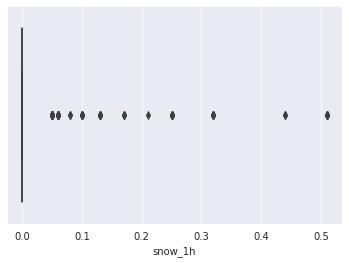

In [61]:
#Plotting snow data shows that it is extremely skewed as observed during univariate analysis
sns.boxplot('snow_1h',data = df_traffic_features)

In [62]:
#only 63 observations have snow greater than 0.0, it can be encoded as no_snow
df_traffic_features.snow_1h[df_traffic_features.snow_1h>0].count()
#63 columns -> change to snow, no_snow

63

In [63]:
def modify_snow1h(x):
    if x==0:
        return 'no_snow'
    else:
        return 'snow'
    
df_traffic_cat['snow_1h'] = df_traffic_cat.snow_1h.map(modify_snow1h)

In [64]:
df_traffic_features.snow_1h

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
48199    0.0
48200    0.0
48201    0.0
48202    0.0
48203    0.0
Name: snow_1h, Length: 48193, dtype: float64

In [65]:
#setting date as index
df_traffic_cat.set_index('date', inplace = True)

In [66]:
df_traffic_cat.head(5)

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
date,,,,,,,,,,,,,,,
2012-10-02,Work Day,15.13,no_snow,40,2012-10-02 09:00:00,5545,1,Morning,10,2012,0,0,0,0,no_rain
2012-10-02,Work Day,16.21,no_snow,75,2012-10-02 10:00:00,4516,1,Morning,10,2012,0,0,0,0,no_rain
2012-10-02,Work Day,16.43,no_snow,90,2012-10-02 11:00:00,4767,1,Morning,10,2012,0,0,0,0,no_rain
2012-10-02,Work Day,16.98,no_snow,90,2012-10-02 12:00:00,5026,1,Afternoon,10,2012,0,0,0,0,no_rain
2012-10-02,Work Day,17.99,no_snow,75,2012-10-02 13:00:00,4918,1,Afternoon,10,2012,0,0,0,0,no_rain


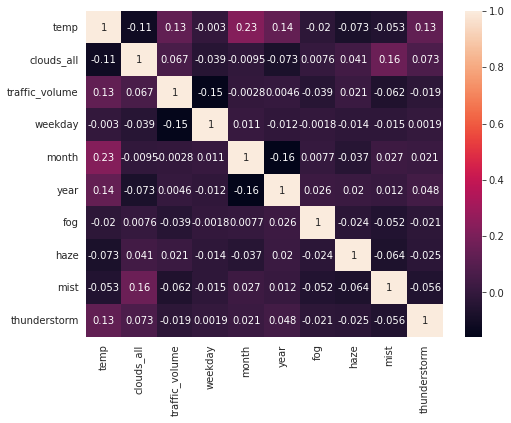

In [67]:
plt.figure(figsize = (8,6))
sns.heatmap(df_traffic_cat.corr(), annot=True)
plt.show()

In [68]:
target = ['traffic_volume']
cat_vars = ['holiday', 'snow_1h','weekday', 'hour', 'month', 'year', 'fog', 'haze','mist', 'thunderstorm', 'rain_1h']
num_vars = ['temp','clouds_all']

# Data Preprocessing and normalization

In [69]:
#Creating pipeline to transform data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('oneHot',OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,num_vars),
    ('cat',categorical_transformer,cat_vars)])

df_traffic_transformed = preprocessor.fit_transform(df_traffic_cat).toarray()

In [70]:
#Splitting data into train and test data

X_train = df_traffic_transformed[:32290]
X_test = df_traffic_transformed[32291:]
y_train = df_traffic_cat.traffic_volume[:32290]
y_test = df_traffic_cat.traffic_volume[32291:]

# Define training model

In [80]:
#Fitting XGBoost regressor and parameter tuning using Grid search
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

tscv = TimeSeriesSplit(n_splits=3)
model = xgb.XGBRegressor()

param_grid = {'nthread':[4,6,8], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100]}
#The number of trees (or rounds) in an XGBoost model is specified to the XGBRegressor class in the n_estimators argument. Default is 100

GridSearch = GridSearchCV(estimator = model,param_grid= param_grid,cv=tscv, n_jobs = 2)


# Train the model

In [81]:
GridSearch.fit(X_train, y_train, verbose=1)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=XGBRegressor(), n_jobs=2,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [100], 'nthread': [4, 6, 8],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]})

# Evaluate and Prediction 

In [82]:
y_pred = GridSearch.predict(X_test)

In [83]:
#Root mean square
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(RMSE)

1025.8277971572822
